In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import re
from wordcloud import WordCloud
import zipfile
from PIL import Image 
import numpy as np 
from IPython.display import display, HTML

data = pd.read_csv("../input/train.csv", usecols = ["title", "image", "image_top_1"])

In [2]:
data.head()

title     ...     image_top_1
0  Кокоби(кокон для сна)     ...          1008.0
1      Стойка для Одежды     ...           692.0
2         Philips bluray     ...          3032.0
3             Автокресло     ...           796.0
4         ВАЗ 2110, 2003     ...          2264.0

[5 rows x 3 columns]

In [3]:
shortenings = [u'мм', u'см', u'м', u'км', u'мл', u'л', u'г', u'кг', u'т', u'лит',
               u'р', u'руб', u'сот', u'га', u'шт', u'ш', u'дб', u'вт', 
               u'ул', u'пр', u'д', u'кв', u'чел', u'жен', u'муж', u'тыс', 
               u'др']

shortenings = u'|'.join(shortenings)

def remove_dots_from_shortenings(match):
    s = match.string[match.start():match.end()]
    return s.replace('.', '')

def clean_text(text):
    try:
        text = text.lower().replace(u'ё', u'е')
        text = re.sub(r'(\d+)[.](\d+)', r'\1,\2', text)
        text = re.sub(u'([a-zа-я][.]){2,}', remove_dots_from_shortenings, text)
        text = re.sub(r'(?<=[^а-я])(' + shortenings + ')[.]', r'\1 ', text)
        return text
    except:
        return ""
    
data["title"] = data["title"].apply(lambda comment: clean_text(comment))

In [4]:
def clean_text(text):
    try:
        textProc = text.lower()
        textProc = " ".join(map(str.strip, re.split("(\d+)", textProc)))
        textProc = textProc.replace(u'²', '2')
        textProc = textProc.replace(u"айфон", "iphone")
        textProc = re.sub('[!@#$_“”""-,¨«»®´·./º½¾¿¡§£₤‘’()]', '', textProc)
        textProc = " ".join(textProc.split())
        return textProc
    except:
        return "name error"
    
data["title"] = data["title"].apply(lambda comment: clean_text(comment))

In [5]:
data.head()

title     ...     image_top_1
0  кокобикокон для сна     ...          1008.0
1    стойка для одежды     ...           692.0
2       philips bluray     ...          3032.0
3           автокресло     ...           796.0
4        ваз 2110 2003     ...          2264.0

[5 rows x 3 columns]

In [6]:
top_image_top_1 = data["image_top_1"].astype(str).value_counts()[:10]
top_image_top_1

nan       112588
2219.0     18739
1002.0     18646
2918.0     15407
2264.0     14517
2218.0     14415
42.0       12328
47.0       11144
82.0       10939
84.0       10652
Name: image_top_1, dtype: int64

In [7]:
top_5 = [2219.0, 1002.0, 2918.0, 2264.0, 2218.0]
some_images_1 = data[data["image_top_1"] == top_5[0]]["image"][:10]
some_images_2 = data[data["image_top_1"] == top_5[1]]["image"][:10]
some_images_3 = data[data["image_top_1"] == top_5[2]]["image"][:10]
some_images_4 = data[data["image_top_1"] == top_5[3]]["image"][:10]
some_images_5 = data[data["image_top_1"] == top_5[4]]["image"][:10]

In [8]:
images_1 = []
images_2 = []
images_3 = []
images_4 = []
images_5 = []

with zipfile.ZipFile("../input/train_jpg.zip", "r") as train_zip:
    files_in_zip = sorted(train_zip.namelist())
    for idx, file in enumerate(files_in_zip):
        if any(file.endswith(x + ".jpg") for x in some_images_1): 
            img = train_zip.extract(file, path = file.split("/")[3])
            images_1.append(img)
        elif any(file.endswith(x + ".jpg") for x in some_images_2): 
            img = train_zip.extract(file, path = file.split("/")[3])
            images_2.append(img)
        elif any(file.endswith(x + ".jpg") for x in some_images_3): 
            img = train_zip.extract(file, path = file.split("/")[3])
            images_3.append(img)
        elif any(file.endswith(x + ".jpg") for x in some_images_4): 
            img = train_zip.extract(file, path = file.split("/")[3])
            images_4.append(img)
        elif any(file.endswith(x + ".jpg") for x in some_images_5): 
            img = train_zip.extract(file, path = file.split("/")[3])
            images_5.append(img)

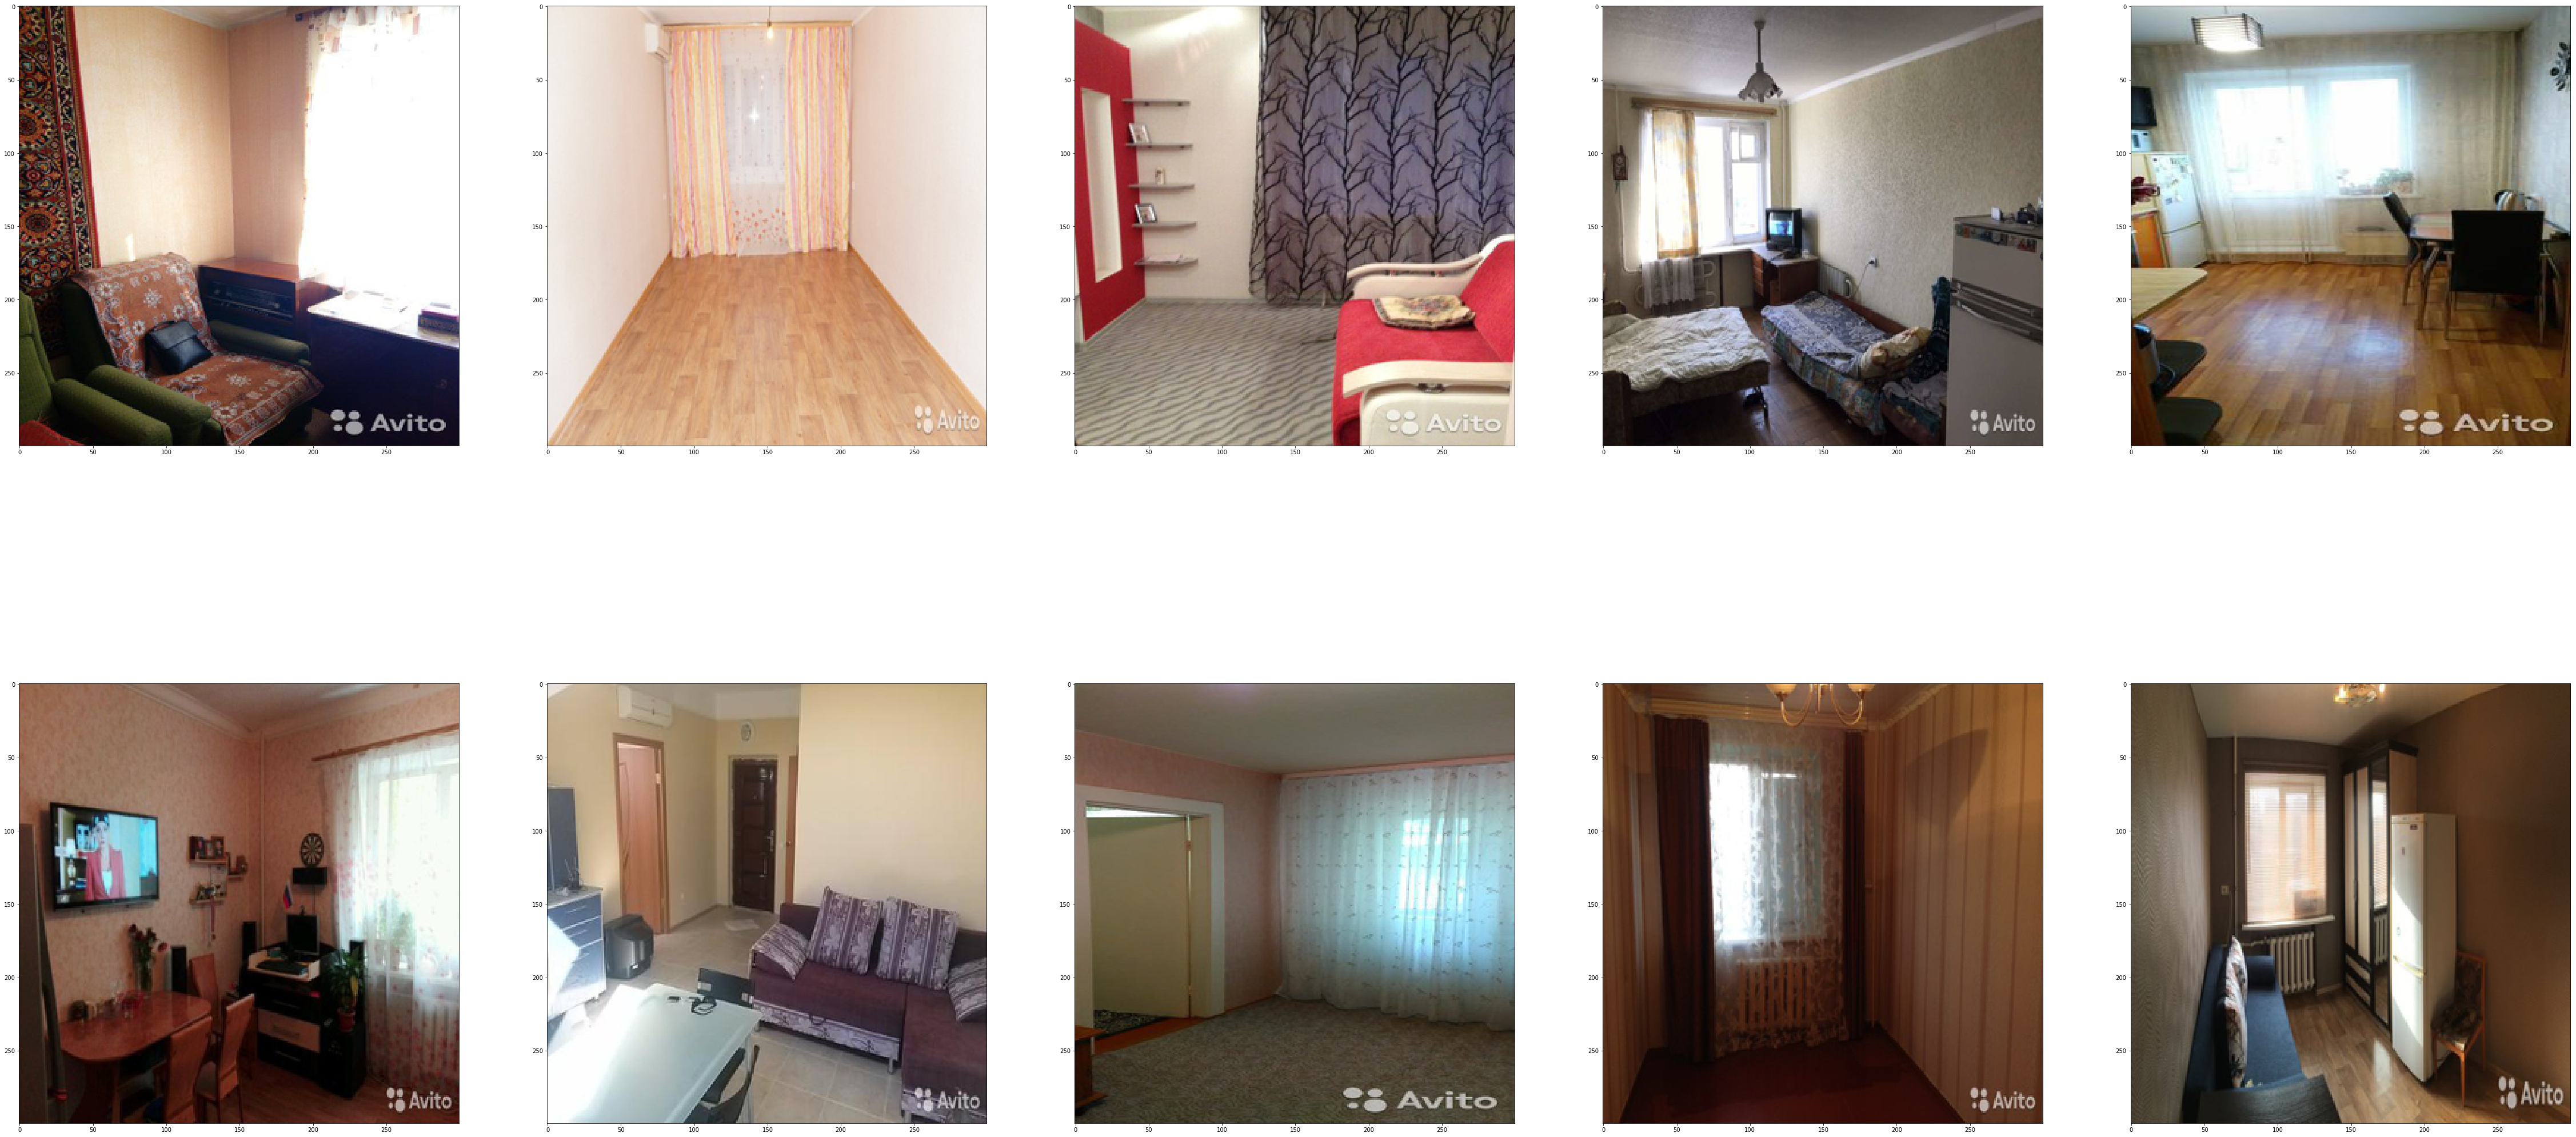

In [9]:
f, ax = plt.subplots(2, 5)
f.set_size_inches(80, 40)
for i in range(10):
    ax[int(i/5)][i%5].imshow(Image.open(images_1[i]).resize((300, 300), Image.ANTIALIAS))
plt.show()

In [10]:
some_title_1 = data.loc[some_images_1.index]
some_title_1

title     ...     image_top_1
33     комната 8 2 м2 в 5 -к 3 5 эт     ...          2219.0
51     2 -к квартира 42 5 м2 6 6 эт     ...          2219.0
287     1 -к квартира 34 м2 5 10 эт     ...          2219.0
373      4 -к квартира 62 м2 2 5 эт     ...          2219.0
714     комната 16 м2 в 1 -к 2 5 эт     ...          2219.0
746      2 -к квартира 44 м2 4 9 эт     ...          2219.0
1194  комната 18 м2 в 4 -к 10 10 эт     ...          2219.0
1253     3 -к квартира 71 м2 4 5 эт     ...          2219.0
1276    комната 21 м2 в 3 -к 1 2 эт     ...          2219.0
1311            студия 22 м2 5 6 эт     ...          2219.0

[10 rows x 3 columns]

In [11]:
pd.Series(np.concatenate([x.split() for x in some_title_1.title.str.lower()])).value_counts()

м2          10
эт          10
-к           9
5            8
2            6
квартира     5
в            4
4            4
комната      4
3            3
10           3
6            3
1            3
34           1
8            1
62           1
9            1
44           1
71           1
16           1
22           1
18           1
42           1
21           1
студия       1
dtype: int64

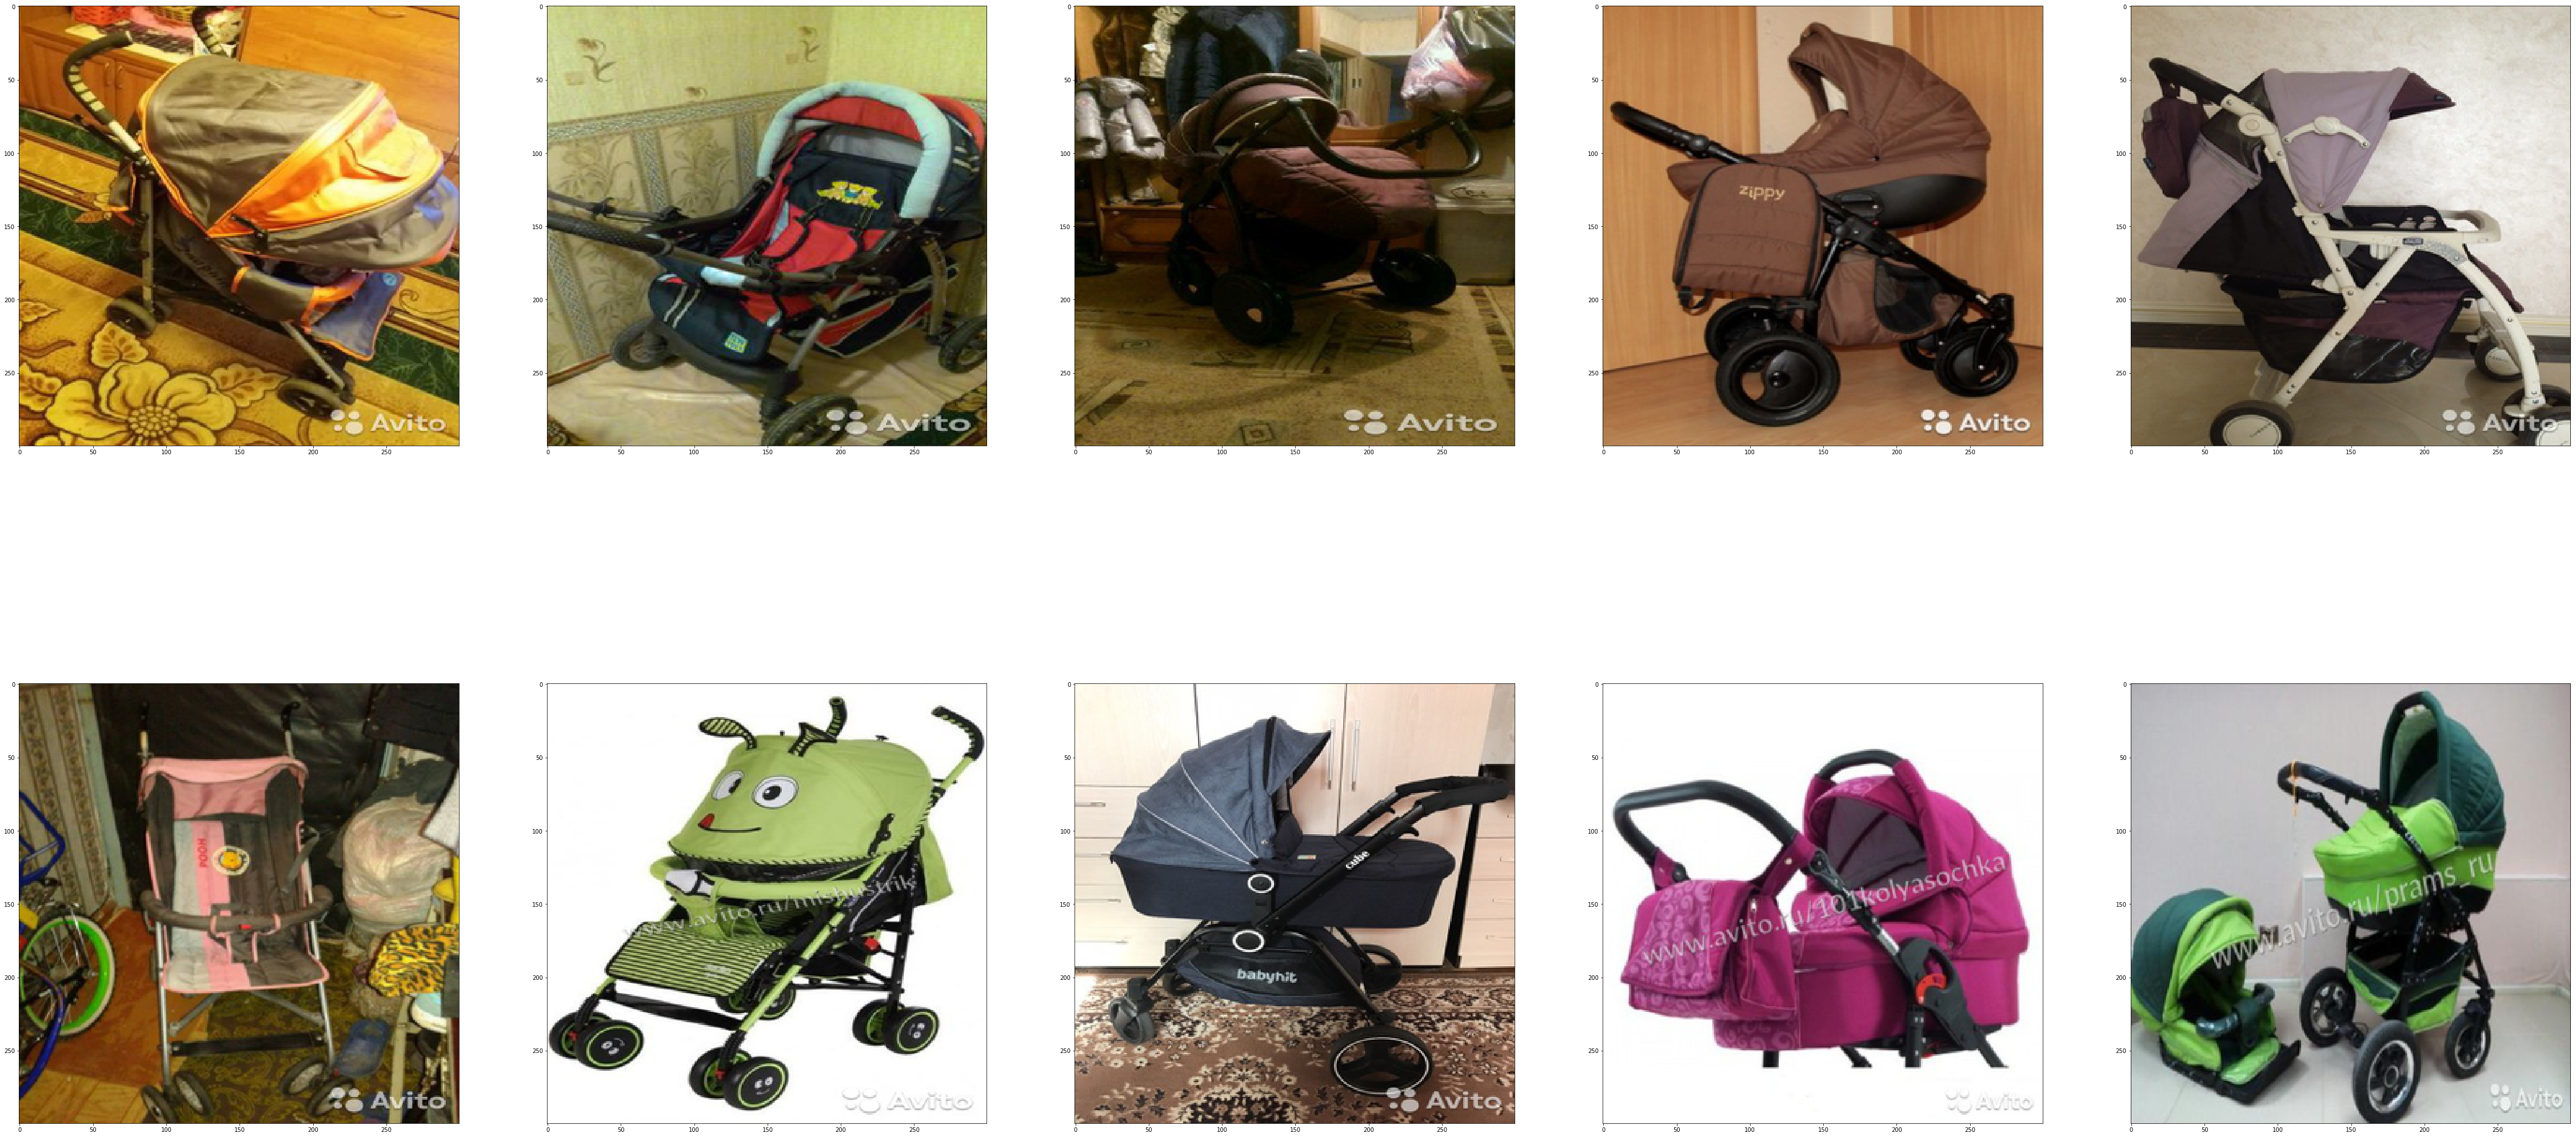

In [12]:
f, ax = plt.subplots(2, 5)
f.set_size_inches(80, 40)
for i in range(10):
    ax[int(i/5)][i%5].imshow(Image.open(images_2[i]).resize((300, 300), Image.ANTIALIAS))
plt.show()

In [13]:
some_title_2 = data.loc[some_images_2.index]
some_title_2

title     ...     image_top_1
35                              коляска 2016 года     ...          1002.0
48                              коляска бу трость     ...          1002.0
132                               детская коляска     ...          1002.0
188         прогулочная коляска chicco simplicity     ...          1002.0
222         коляска-трость bambola hp- 312 c жужа     ...          1002.0
225  коляска tutis zippy sport plus 2 в 1 шоколад     ...          1002.0
291        лот 17783 коляска expander eliza 2 в 1     ...          1002.0
384   3 в 1 блочная система и поворотные колесики     ...          1002.0
443                           коляска zippy 2 в 1     ...          1002.0
633                              коляска - трость     ...          1002.0

[10 rows x 3 columns]

In [14]:
pd.Series(np.concatenate([x.split() for x in some_title_2.title.str.lower()])).value_counts()

коляска           8
в                 4
1                 4
2                 3
трость            2
zippy             2
expander          1
3                 1
17783             1
прогулочная       1
simplicity        1
бу                1
блочная           1
c                 1
plus              1
312               1
2016              1
tutis             1
sport             1
лот               1
шоколад           1
жужа              1
eliza             1
колесики          1
hp-               1
коляска-трость    1
года              1
и                 1
детская           1
chicco            1
-                 1
система           1
bambola           1
поворотные        1
dtype: int64

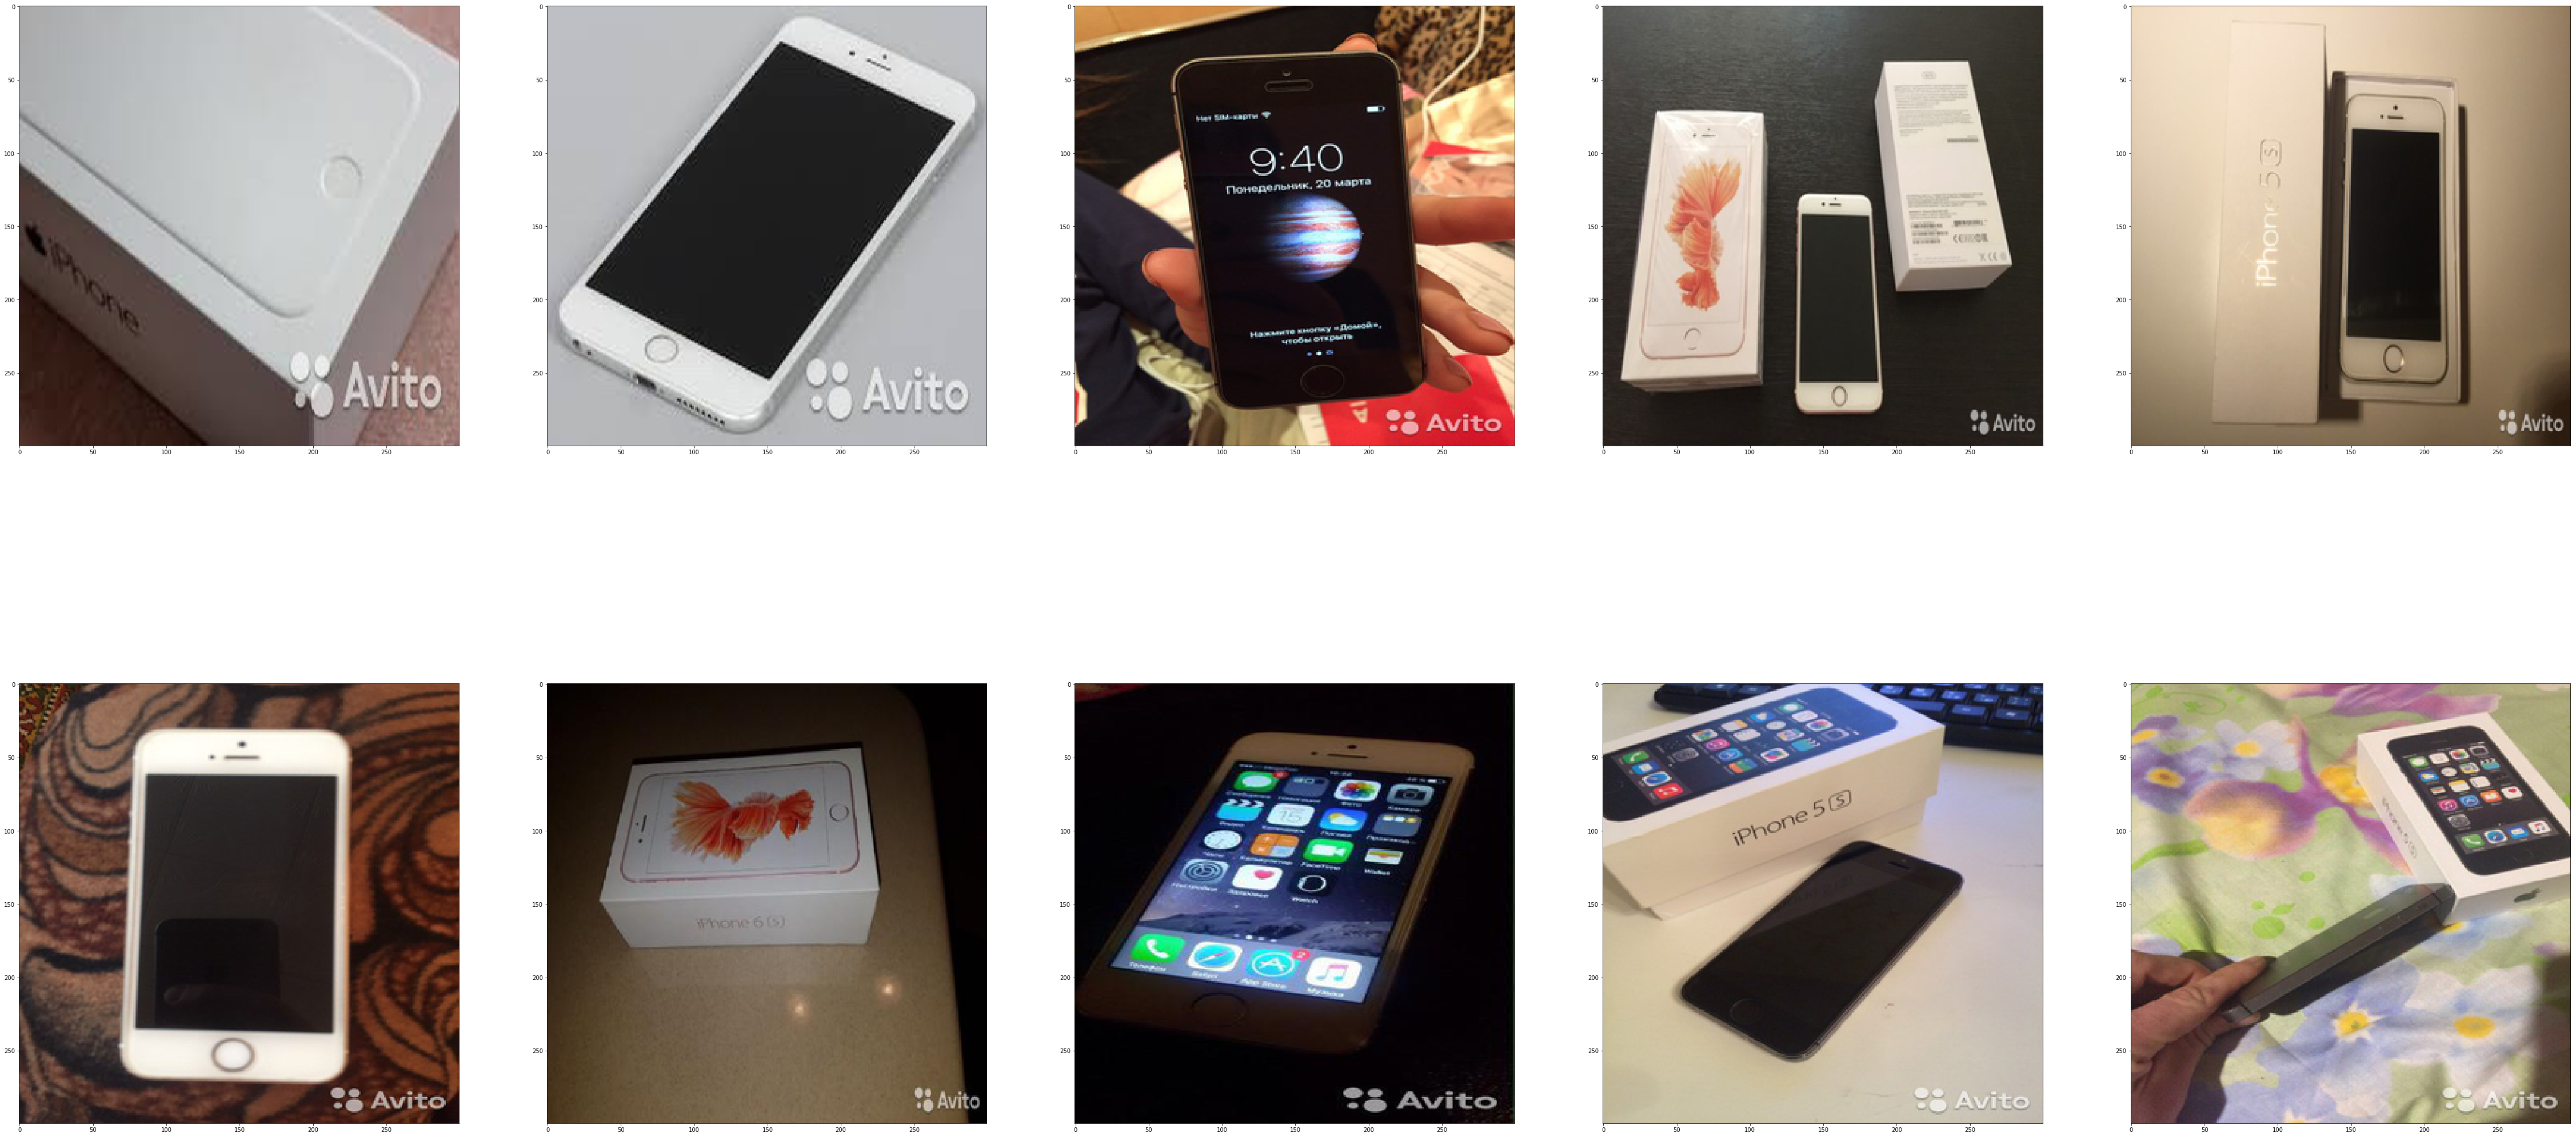

In [15]:
f, ax = plt.subplots(2, 5)
f.set_size_inches(80, 40)
for i in range(10):
    ax[int(i/5)][i%5].imshow(Image.open(images_3[i]).resize((300, 300), Image.ANTIALIAS))
plt.show()

In [16]:
some_title_3 = data.loc[some_images_3.index]
some_title_3

title     ...     image_top_1
328                     iphone 5 s 32 gb     ...          2918.0
450                   iphone 5 s золотой     ...          2918.0
452                          iphone 5 se     ...          2918.0
476                             iphone 6     ...          2918.0
560                           iphone 5 s     ...          2918.0
647                        iphone 6 plus     ...          2918.0
962   iphone 6 s 16 gb розовый идеал рст     ...          2918.0
1251                    iphone 5 s 16 gb     ...          2918.0
1340             продаю iphone 6 s 16 gb     ...          2918.0
1366                            iphone 5     ...          2918.0

[10 rows x 3 columns]

In [17]:
pd.Series(np.concatenate([x.split() for x in some_title_3.title.str.lower()])).value_counts()

iphone     10
5           6
s           6
6           4
gb          4
16          3
plus        1
продаю      1
рст         1
se          1
розовый     1
32          1
золотой     1
идеал       1
dtype: int64